**AirBnB Fair Valuation**

Welcome to Airbnb Analysis Corp.! Your task is to set the competitive **daily accomodation** rate for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a **fair value** that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!

    The owner has been a host since August 2010
    The location is lon:151.274506, lat:33.889087
    The current review score rating 95.0
    Number of reviews 53
    Minimum nights 4
    The house can accomodate 10 people.
    The owner currently charges a cleaning fee of 370
    The house has 3 bathrooms, 5 bedrooms, 7 beds.
    The house is available for 255 of the next 365 days
    The client is verified, and they are a superhost.
    The cancelation policy is strict with a 14 days grace period.
    The host requires a security deposit of $1,500

All values strictly apply to the month of July 2018AirBnB Fair Valuation

Bondi is a suburb of eastern Sydney, in the state of New South Wales, Australia


## I. Data Collection & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.style as style
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model  import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Machine learning\Airbnb Sydney\airbnb.csv")

In [3]:
df.head()

,Unnamed: 0,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'name', 'summary', 'space',
       'description', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_depos

    The owner has been a host since August 2010
    The location is lon:151.274506, lat:33.889087
    The current review score rating 95.0
    Number of reviews 53
    Minimum nights 4
    The house can accomodate 10 people.
    The owner currently charges a cleaning fee of 370
    The house has 3 bathrooms, 5 bedrooms, 7 beds.
    The house is available for 255 of the next 365 days
    The client is verified, and they are a superhost.
    The cancelation policy is strict with a 14 days grace period.
    The host requires a security deposit of $1,500

In [5]:
sugested_cols = ['host_since','latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds','number_of_reviews',
        'review_scores_rating','cleaning_fee','minimum_nights','availability_365','host_identity_verified',
       'cancellation_policy','security_deposit','accommodates','price']

In [6]:
sugested_df = df[sugested_cols]

In [7]:
sugested_df.head()

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,cleaning_fee,minimum_nights,availability_365,host_identity_verified,cancellation_policy,security_deposit,accommodates,price
0,23/09/09,-33.869168,151.226562,NaN,1.0,1.0,177,92.0,NaN,2,339,f,moderate,NaN,1,$65.00
1,14/05/09,-33.865153,151.191896,1.0,1.0,1.0,468,95.0,$55.00,2,188,t,strict_14_with_grace_period,$0.00,2,$98.00
2,20/11/09,-33.800929,151.261722,3.0,3.0,3.0,1,100.0,$100.00,5,168,t,strict_14_with_grace_period,$900.00,6,$469.00
3,30/11/09,-33.890765,151.200450,1.0,1.0,1.0,172,89.0,NaN,2,215,t,moderate,NaN,2,$63.00
4,30/11/09,-33.889667,151.200896,2.0,1.0,1.0,147,90.0,NaN,2,287,t,moderate,NaN,1,$39.00


In [10]:
df.shape

(27070, 85)

# EDA of Selected columns

In [11]:
sugested_df.columns

Index(['host_since', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'review_scores_rating', 'cleaning_fee',
       'minimum_nights', 'availability_365', 'host_identity_verified',
       'cancellation_policy', 'security_deposit', 'accommodates', 'price'],
      dtype='object')

##### Sanity check

In [12]:
sugested_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_since              27035 non-null  object 
 1   latitude                27070 non-null  float64
 2   longitude               27070 non-null  float64
 3   bathrooms               27048 non-null  float64
 4   bedrooms                27062 non-null  float64
 5   beds                    27037 non-null  float64
 6   number_of_reviews       27070 non-null  int64  
 7   review_scores_rating    19512 non-null  float64
 8   cleaning_fee            19250 non-null  object 
 9   minimum_nights          27070 non-null  int64  
 10  availability_365        27070 non-null  int64  
 11  host_identity_verified  27035 non-null  object 
 12  cancellation_policy     27070 non-null  object 
 13  security_deposit        16722 non-null  object 
 14  accommodates            27070 non-null

In [13]:
sugested_df.shape

(27070, 16)

In [14]:
sugested_df.isnull().sum()

host_since                   35
latitude                      0
longitude                     0
bathrooms                    22
bedrooms                      8
beds                         33
number_of_reviews             0
review_scores_rating       7558
cleaning_fee               7820
minimum_nights                0
availability_365              0
host_identity_verified       35
cancellation_policy           0
security_deposit          10348
accommodates                  0
price                         0
dtype: int64

In [15]:
cat_vars = sugested_df.select_dtypes(include='object').columns
num_vars = sugested_df.select_dtypes(include=np.number).columns

In [16]:
cat_vars

Index(['host_since', 'cleaning_fee', 'host_identity_verified',
       'cancellation_policy', 'security_deposit', 'price'],
      dtype='object')

In [17]:
num_vars

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'review_scores_rating', 'minimum_nights',
       'availability_365', 'accommodates'],
      dtype='object')

### Reviewing the categorical variables

In [18]:
sugested_df[['price', 'cleaning_fee', 'security_deposit']]

,price,cleaning_fee,security_deposit
0,$65.00,NaN,NaN
1,$98.00,$55.00,$0.00
2,$469.00,$100.00,$900.00
3,$63.00,NaN,NaN
4,$39.00,NaN,NaN
...,...,...,...
27065,$101.00,$0.00,$200.00
27066,$40.00,NaN,NaN
27067,$169.00,$80.00,$300.00
27068,$98.00,$120.00,$400.00


In [19]:
# sugested_df['price'] = sugested_df['price'].str.lstrip('$')\
#                                            .str.strip()\
#                                            .str.replace(',','')\
#                                            .astype(float)

In [20]:
fees = ['price', 'cleaning_fee', 'security_deposit']
for i in fees:
    sugested_df[i] = sugested_df[i].replace('[\$,]', '', regex=True).astype(float)

In [21]:
sugested_df[fees].head()

,price,cleaning_fee,security_deposit
0,65.0,NaN,NaN
1,98.0,55.0,0.0
2,469.0,100.0,900.0
3,63.0,NaN,NaN
4,39.0,NaN,NaN


In [22]:
sugested_df[['price', 'cleaning_fee', 'security_deposit']].dtypes

price               float64
cleaning_fee        float64
security_deposit    float64
dtype: object

In [23]:
def setup_plot():
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    plt.xticks(rotation=40)
    plt.gcf().set_size_inches(5, 3)  

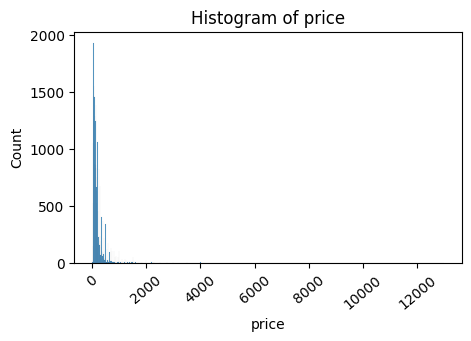

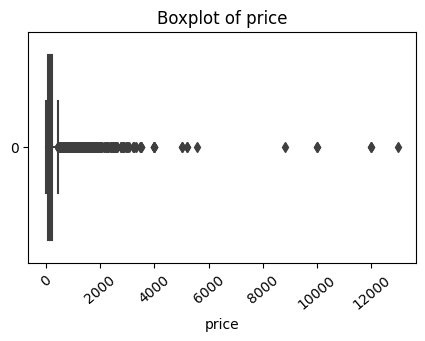

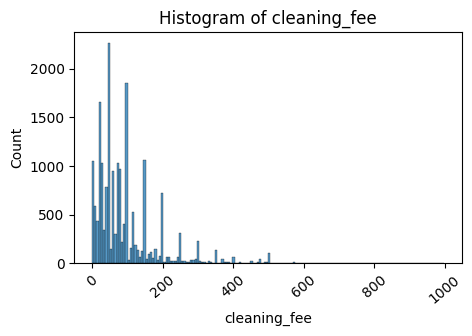

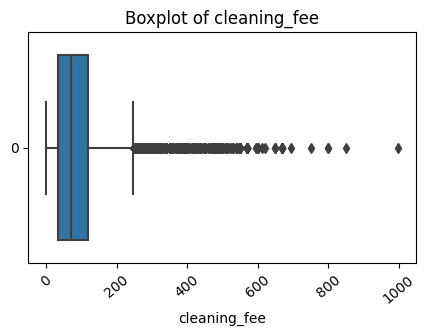

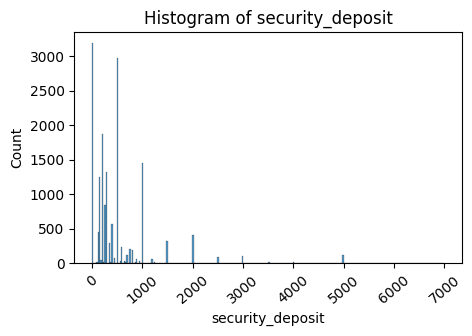

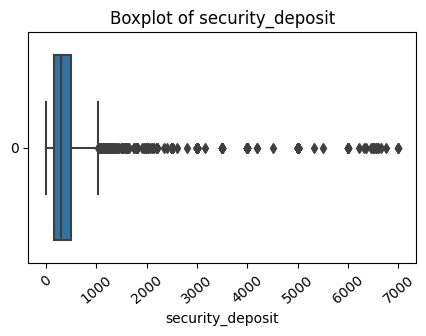

In [24]:
for col in fees:
    sns.histplot(x=col, data=sugested_df)
    setup_plot()
    plt.title(f'Histogram of {col}')
    plt.show()

    sns.boxplot(x=col, data=sugested_df)
    setup_plot()
    plt.title(f'Boxplot of {col}')
    plt.show()

*Comment:There are too many outliers and skewed data*

In [25]:
sugested_df[cat_vars].head()

,host_since,cleaning_fee,host_identity_verified,cancellation_policy,security_deposit,price
0,23/09/09,NaN,f,moderate,NaN,65.0
1,14/05/09,55.0,t,strict_14_with_grace_period,0.0,98.0
2,20/11/09,100.0,t,strict_14_with_grace_period,900.0,469.0
3,30/11/09,NaN,t,moderate,NaN,63.0
4,30/11/09,NaN,t,moderate,NaN,39.0


#### 'host_since'

In [26]:
sugested_df['host_since'] = pd.to_datetime(sugested_df['host_since']).dt.year

In [27]:
sugested_df['host_since'].isnull().sum()

35

*Comment:The misssing values here will be dropped because they are not plenty.*

#### cancellation_policy

In [28]:
sugested_df['cancellation_policy'].value_counts()

cancellation_policy
strict_14_with_grace_period    11692
flexible                        8567
moderate                        6777
super_strict_60                   32
super_strict_30                    2
Name: count, dtype: int64

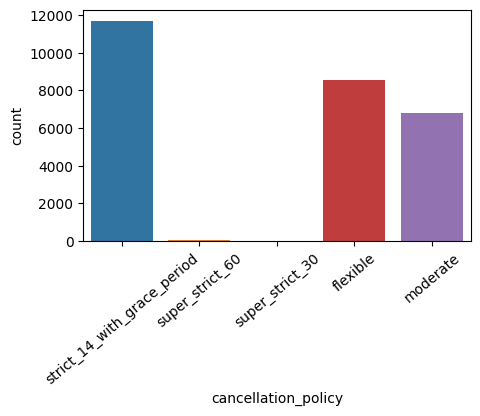

In [29]:
sns.countplot(x='cancellation_policy', data = sugested_df, order=['strict_14_with_grace_period','super_strict_60', 'super_strict_30', 'flexible', 'moderate'])
setup_plot()
plt.show()

*Comment: since there are only few items in super_strict_60, super_strict_3, then will put them under strict.*

In [30]:
sugested_df['cancellation_policy'] = sugested_df['cancellation_policy']\
                                    .replace(['super_strict_30', 'super_strict_60','strict_14_with_grace_period'],'strict')

In [31]:
sugested_df['cancellation_policy'].value_counts()

cancellation_policy
strict      11726
flexible     8567
moderate     6777
Name: count, dtype: int64

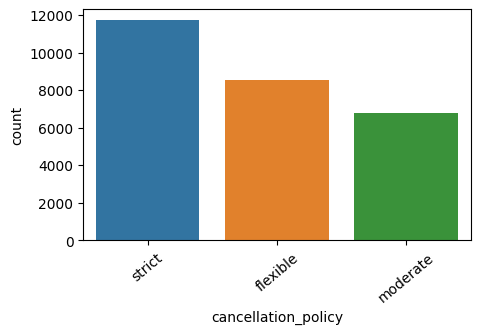

In [32]:
sns.countplot(x='cancellation_policy', data = sugested_df, order=['strict', 'flexible', 'moderate'])
setup_plot()
plt.show()

#### host_identity_verified

In [33]:
sugested_df['host_identity_verified'].value_counts()

host_identity_verified
f    14323
t    12712
Name: count, dtype: int64

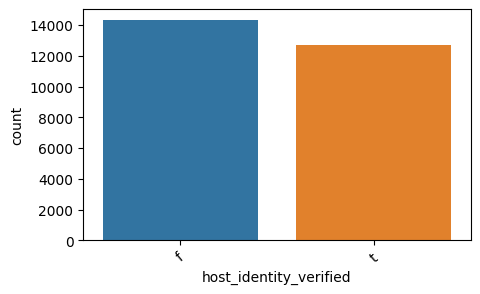

In [34]:
sns.countplot(x='host_identity_verified',data = sugested_df)
setup_plot()

### Reviewing the numerical variables

In [35]:
sugested_df[num_vars].head()

,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,minimum_nights,availability_365,accommodates
0,-33.869168,151.226562,NaN,1.0,1.0,177,92.0,2,339,1
1,-33.865153,151.191896,1.0,1.0,1.0,468,95.0,2,188,2
2,-33.800929,151.261722,3.0,3.0,3.0,1,100.0,5,168,6
3,-33.890765,151.200450,1.0,1.0,1.0,172,89.0,2,215,2
4,-33.889667,151.200896,2.0,1.0,1.0,147,90.0,2,287,1


In [36]:
sugested_df[num_vars].isnull().sum()

latitude                   0
longitude                  0
bathrooms                 22
bedrooms                   8
beds                      33
number_of_reviews          0
review_scores_rating    7558
minimum_nights             0
availability_365           0
accommodates               0
dtype: int64

In [37]:
sugested_df[['bathrooms', 'beds', 'bedrooms']].describe()

,bathrooms,beds,bedrooms
count,27048.000000,27037.000000,27062.000000
mean,1.352337,2.012169,1.614071
std,0.664092,1.526399,1.109725
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.500000,2.000000,2.000000
max,10.000000,29.000000,46.000000


#### bathrooms - 22 missing values

In [38]:
sugested_df['bathrooms'].mode()

0    1.0
Name: bathrooms, dtype: float64

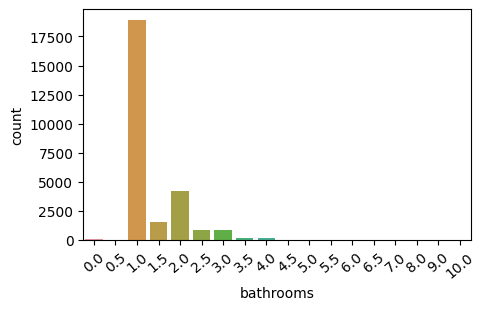

In [39]:
sns.countplot(x='bathrooms', data= sugested_df)
setup_plot()

In [40]:
sugested_df['bathrooms'].fillna(1, inplace=True)

In [41]:
sugested_df.loc[sugested_df['bathrooms'] > 4.5,'bathrooms'] = 4.5

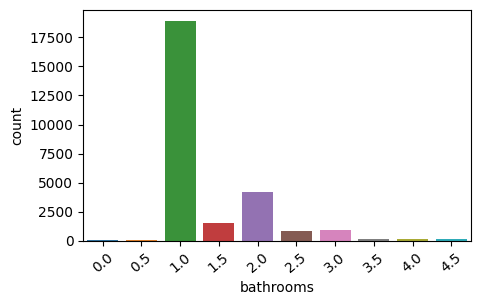

In [42]:
sns.countplot(x='bathrooms',data= sugested_df)
setup_plot()

#### bedrooms - 8 missing values

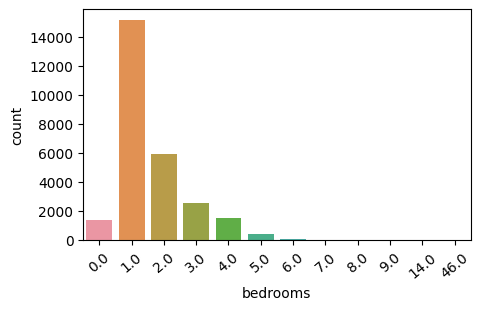

In [43]:
sns.countplot(x='bedrooms',data= sugested_df)
setup_plot()

In [44]:
sugested_df['bedrooms'].fillna(1,inplace=True)

In [45]:
sugested_df.loc[sugested_df['bedrooms'] >= 6,'bedrooms'] = 5

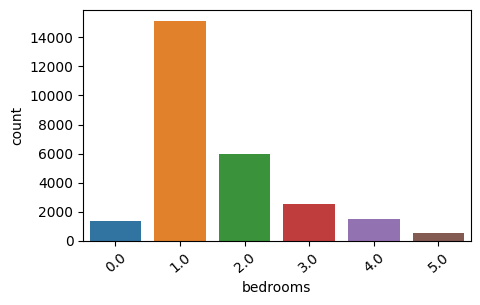

In [46]:
sns.countplot(x='bedrooms',data= sugested_df)
setup_plot()

#### beds - 33 missing values

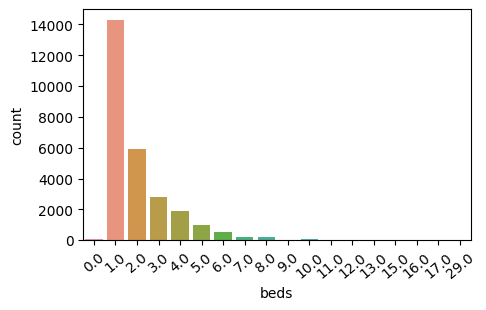

In [47]:
sns.countplot(x='beds',data= sugested_df)
setup_plot()

In [48]:
sugested_df['beds'].fillna(1,inplace=True)

In [49]:
sugested_df.loc[sugested_df['beds'] > 9,'beds'] = 9

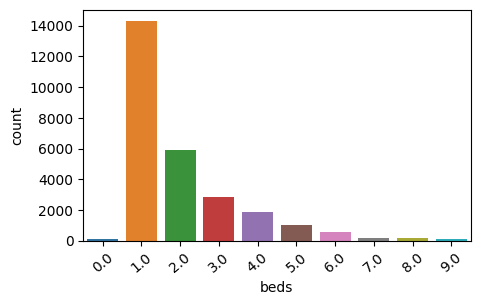

In [50]:
sns.countplot(x='beds',data= sugested_df)
setup_plot()

#### review_scores_rating - 7 558 missing values

In [51]:
sugested_df['review_scores_rating'].isnull().sum() / len(sugested_df) * 100

27.920206871074992

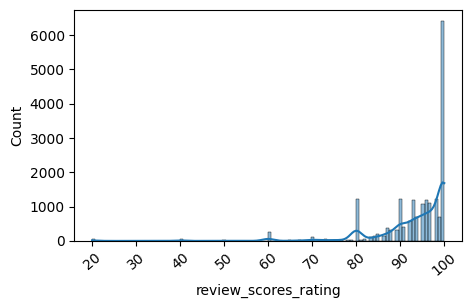

In [52]:
sns.histplot(x='review_scores_rating',data = sugested_df, kde=True)
setup_plot()

In [53]:
sugested_df['review_scores_rating'].skew()

-3.1689635579648163

In [54]:
sugested_df['review_scores_rating'].describe().reset_index()

,index,review_scores_rating
0,count,19512.000000
1,mean,93.412413
2,std,9.354959
3,min,20.000000
4,25%,90.000000
5,50%,96.000000
6,75%,100.000000
7,max,100.000000


In [55]:
def impute_nan_rsr(sugested_df, variable, median):
    median = sugested_df[variable].median()
    sugested_df[variable + '_median'] = sugested_df[variable].fillna(median)

In [56]:
impute_nan_rsr(sugested_df, 'review_scores_rating', 'median')

In [57]:
sugested_df['linear_interpo_rsr'] = sugested_df['review_scores_rating'].interpolate(method='linear')
sugested_df['quadratic_interpo_rsr'] = sugested_df['review_scores_rating'].interpolate(method='quadratic')
sugested_df['nearest_interpo_rsr'] = sugested_df['review_scores_rating'].interpolate(method='nearest')

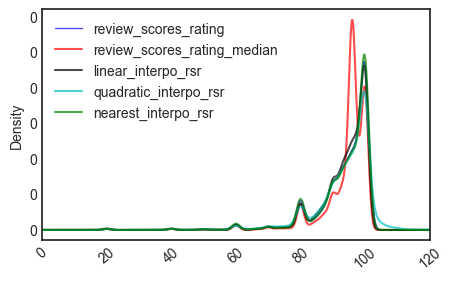

In [58]:
style.use('seaborn-white')
fig = plt.figure()
ax = fig.add_subplot(111)

sugested_df['review_scores_rating'].plot(kind='kde', ax=ax, c='b', lw=1, alpha=0.7)
sugested_df['review_scores_rating_median'].plot(kind='kde', ax=ax, c='r', alpha=0.7)
sugested_df['linear_interpo_rsr'].plot(kind='kde', ax=ax, c='k', alpha=0.7)
sugested_df['quadratic_interpo_rsr'].plot(kind='kde', ax=ax, c='c', alpha=0.7)
sugested_df['nearest_interpo_rsr'].plot(kind='kde', ax=ax, c='g', alpha=0.7)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlim(0, 120)
setup_plot()  
plt.show()

*Comment: nearest_interpo_rsr look like the closest to the original distribution.*

In [59]:
sugested_df.drop(['review_scores_rating',
       'review_scores_rating_median', 'linear_interpo_rsr',
       'quadratic_interpo_rsr'], axis=1, inplace=True)

In [60]:
sugested_df.rename(columns={'nearest_interpo_rsr': 'review_scores_rating_nir'}, inplace=True)

### Fixing the rest of the missing values

*Comment: dropping the host_identity_verified automatically drops the missing values in host_since.*

In [61]:
sugested_df = sugested_df[~sugested_df['host_identity_verified'].isnull()]

In [62]:
sugested_df.isnull().sum()

host_since                      0
latitude                        0
longitude                       0
bathrooms                       0
bedrooms                        0
beds                            0
number_of_reviews               0
cleaning_fee                 7810
minimum_nights                  0
availability_365                0
host_identity_verified          0
cancellation_policy             0
security_deposit            10331
accommodates                    0
price                           0
review_scores_rating_nir        0
dtype: int64

In [63]:
sugested_df['security_deposit'].isnull().sum() / len(sugested_df) * 100

38.21342703902349

*Comment: since the security deposit is more than 30 %, then better to drop this column.*

In [64]:
sugested_df['cleaning_fee'].isnull().sum() / len(sugested_df) * 100

28.888477899019787

In [65]:
sugested_df[['cleaning_fee', 'security_deposit']].describe()

,cleaning_fee,security_deposit
count,19225.000000,16704.000000
mean,93.774928,495.092613
std,91.728420,687.718259
min,0.000000,0.000000
25%,35.000000,150.000000
50%,70.000000,300.000000
75%,120.000000,500.000000
max,999.000000,7000.000000


In [66]:
sugested_df.drop('security_deposit', axis=1, inplace=True)

#### Cleaning fee - 7 810 missing values

In [67]:
def impute_nan_clf(sugested_df, variable, median):
    median = sugested_df[variable].median()
    sugested_df[variable + '_median'] = sugested_df[variable].fillna(median)

In [68]:
impute_nan_rsr(sugested_df, 'cleaning_fee', 'median')

In [69]:
sugested_df['linear_interpo_clf'] = sugested_df['cleaning_fee'].interpolate(method='linear')
sugested_df['quadratic_interpo_clf'] = sugested_df['cleaning_fee'].interpolate(method='quadratic')
sugested_df['nearest_interpo_clf'] = sugested_df['cleaning_fee'].interpolate(method='nearest')

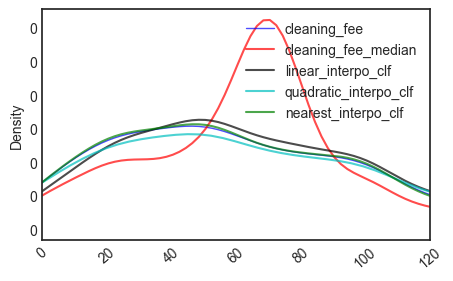

In [70]:
style.use('seaborn-white')
fig = plt.figure()
ax = fig.add_subplot(111)

sugested_df['cleaning_fee'].plot(kind='kde', ax=ax, c='b', lw=1, alpha=0.7)
sugested_df['cleaning_fee_median'].plot(kind='kde', ax=ax, c='r', alpha=0.7)
sugested_df['linear_interpo_clf'].plot(kind='kde', ax=ax, c='k', alpha=0.7)
sugested_df['quadratic_interpo_clf'].plot(kind='kde', ax=ax, c='c', alpha=0.7)
sugested_df['nearest_interpo_clf'].plot(kind='kde', ax=ax, c='g', alpha=0.7)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlim(0, 120)
setup_plot()  
plt.show()

*Comment: nearest_interpo_rsr look like the closest to the original distribution.*

In [71]:
sugested_df.columns

Index(['host_since', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'cleaning_fee', 'minimum_nights',
       'availability_365', 'host_identity_verified', 'cancellation_policy',
       'accommodates', 'price', 'review_scores_rating_nir',
       'cleaning_fee_median', 'linear_interpo_clf', 'quadratic_interpo_clf',
       'nearest_interpo_clf'],
      dtype='object')

In [72]:
sugested_df.drop(['cleaning_fee',
       'cleaning_fee_median', 'linear_interpo_clf', 'quadratic_interpo_clf'], axis=1, inplace=True)

In [73]:
sugested_df.rename(columns={'nearest_interpo_clf': 'cleaning_fee_nir'}, inplace=True)

In [74]:
sugested_df.isnull().sum()

host_since                  0
latitude                    0
longitude                   0
bathrooms                   0
bedrooms                    0
beds                        0
number_of_reviews           0
minimum_nights              0
availability_365            0
host_identity_verified      0
cancellation_policy         0
accommodates                0
price                       0
review_scores_rating_nir    0
cleaning_fee_nir            1
dtype: int64

In [75]:
sugested_df = sugested_df.dropna(subset=['cleaning_fee_nir'])

In [76]:
sugested_df.dtypes

host_since                  float64
latitude                    float64
longitude                   float64
bathrooms                   float64
bedrooms                    float64
beds                        float64
number_of_reviews             int64
minimum_nights                int64
availability_365              int64
host_identity_verified       object
cancellation_policy          object
accommodates                  int64
price                       float64
review_scores_rating_nir    float64
cleaning_fee_nir            float64
dtype: object

### Outlier management

In [77]:
sugested_df.describe()

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,accommodates,price,review_scores_rating_nir,cleaning_fee_nir
count,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000
mean,2014.588777,-33.862381,151.210661,1.349190,1.607272,2.004772,13.999334,4.506732,102.117741,3.383554,209.143264,93.330584,93.025301
std,1.625198,0.072240,0.079426,0.645652,1.056034,1.485156,29.800903,14.559419,128.107778,2.196923,303.091970,9.532211,90.974359
min,2009.000000,-34.135212,150.644964,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000
25%,2014.000000,-33.897603,151.184472,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,80.000000,90.000000,35.000000
50%,2015.000000,-33.883056,151.223241,1.000000,1.000000,1.000000,3.000000,2.000000,32.000000,2.000000,135.000000,96.000000,70.000000
75%,2016.000000,-33.831850,151.264874,1.500000,2.000000,2.000000,13.000000,5.000000,179.000000,4.000000,229.000000,100.000000,120.000000
max,2018.000000,-33.389728,151.339811,4.500000,5.000000,9.000000,468.000000,1000.000000,365.000000,16.000000,12999.000000,100.000000,999.000000


In [78]:
sugested_df[['minimum_nights','cleaning_fee_nir']].describe()

,minimum_nights,cleaning_fee_nir
count,27034.000000,27034.000000
mean,4.506732,93.025301
std,14.559419,90.974359
min,1.000000,0.000000
25%,1.000000,35.000000
50%,2.000000,70.000000
75%,5.000000,120.000000
max,1000.000000,999.000000


##### Minimum nights

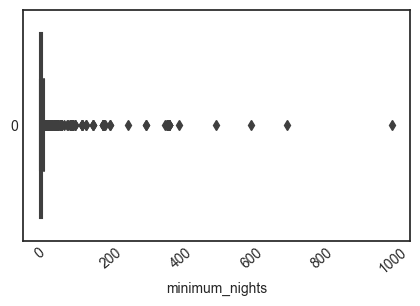

In [79]:
sns.boxplot(x=sugested_df['minimum_nights'])
setup_plot()

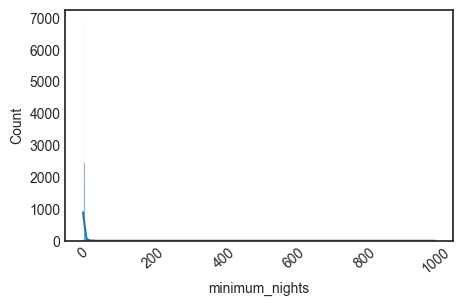

In [80]:
sns.histplot(x=sugested_df['minimum_nights'], kde=True)
setup_plot()

In [81]:
above365 = sugested_df.loc[sugested_df['minimum_nights'] > 365]
above365

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,host_identity_verified,cancellation_policy,accommodates,price,review_scores_rating_nir,cleaning_fee_nir
4716,2014.0,-33.844740,151.224580,1.0,0.0,1.0,5,600,353,t,flexible,2,105.0,85.0,80.0
12483,2016.0,-33.893182,151.270627,1.0,2.0,2.0,5,500,0,f,moderate,4,280.0,96.0,100.0
14167,2016.0,-33.892167,151.262900,1.0,2.0,2.0,9,395,178,f,flexible,4,245.0,96.0,50.0
15421,2015.0,-33.932582,151.147610,1.0,1.0,1.0,0,1000,91,t,flexible,2,92.0,93.0,34.0
26102,2017.0,-33.915065,151.238112,2.0,1.0,2.0,1,700,0,f,flexible,2,111.0,100.0,280.0


In [82]:
len(above365)

5

In [83]:
above180 = sugested_df.loc[sugested_df['minimum_nights'] > 180]
above180.head(5)

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,host_identity_verified,cancellation_policy,accommodates,price,review_scores_rating_nir,cleaning_fee_nir
1240,2013.0,-33.881952,151.216412,1.0,1.0,1.0,5,364,184,f,strict,3,161.0,80.0,100.0
1486,2014.0,-33.896985,151.204711,1.0,1.0,1.0,12,360,364,f,strict,1,50.0,78.0,50.0
2453,2014.0,-33.860753,151.172897,1.5,3.0,3.0,14,365,363,t,strict,6,189.0,94.0,90.0
2796,2013.0,-33.802105,151.288583,1.0,3.0,5.0,1,182,0,t,strict,5,165.0,100.0,100.0
4716,2014.0,-33.844740,151.224580,1.0,0.0,1.0,5,600,353,t,flexible,2,105.0,85.0,80.0


In [84]:
len(above180)

26

In [85]:
above30 = sugested_df.loc[(sugested_df['minimum_nights'] > 30) & (sugested_df['minimum_nights'] < 180)]
above30.head(5)

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,host_identity_verified,cancellation_policy,accommodates,price,review_scores_rating_nir,cleaning_fee_nir
207,2012.0,-33.887813,151.270488,1.0,1.0,1.0,6,60,303,t,strict,2,72.0,97.0,80.0
409,2012.0,-33.892535,151.273050,2.0,2.0,3.0,9,90,92,t,strict,4,345.0,88.0,300.0
424,2012.0,-33.890862,151.274395,1.0,2.0,2.0,5,38,0,t,strict,4,250.0,84.0,100.0
508,2013.0,-33.797565,151.276409,1.0,1.0,1.0,157,90,258,t,flexible,2,124.0,97.0,100.0
967,2013.0,-33.804864,151.290791,1.0,2.0,2.0,3,50,8,t,strict,3,176.0,93.0,125.0


In [86]:
len(above30)

198

*Comment: Since there are only 5 + 21 + 198 (224 to be dropped) houses which has more than 30 days minimum night, better to drop them since the final task is to predict price for a short term house - with 4 minimum nights.*

In [87]:
combined_indices = above365.index.union(above180.index).union(above30.index)

In [88]:
sugested_df = sugested_df.drop(combined_indices)

In [89]:
len(sugested_df)

26810

##### Cleaning fee

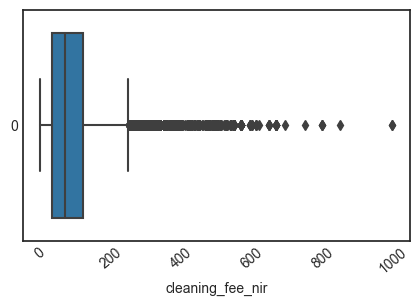

In [90]:
sns.boxplot(x=sugested_df['cleaning_fee_nir'])
setup_plot()

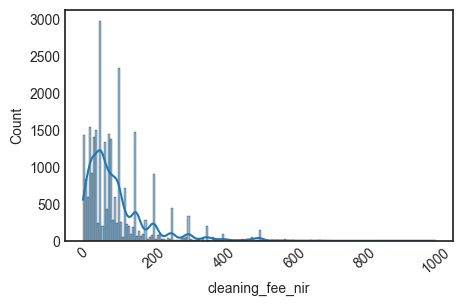

In [91]:
sns.histplot(x=sugested_df['cleaning_fee_nir'], kde=True)
setup_plot()

In [92]:
non_outlier_cleaning_fee = (
    (sugested_df['cleaning_fee_nir'] < sugested_df['cleaning_fee_nir'].quantile(0.97))
)
sugested_df = sugested_df[non_outlier_cleaning_fee]

In [93]:
len(sugested_df)

26000

*Comment: I decided to remove outliers from the upper quantile only since there are owner who dont charge cleaning fee instead add the fee to their overall nightly price. 810 items were dropped.*

In [94]:
26000/26810

0.969787392763894

*Comment: 810 items were dropped.*

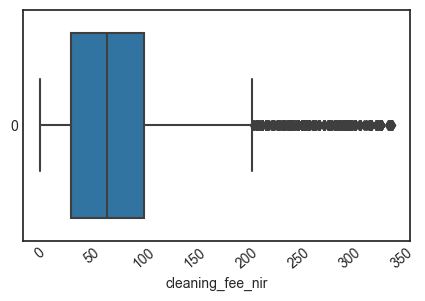

In [95]:
sns.boxplot(x=sugested_df['cleaning_fee_nir'])
setup_plot()

In [96]:
clf200 = sugested_df.loc[sugested_df['cleaning_fee_nir'] > 200]
clf200.head()

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,host_identity_verified,cancellation_policy,accommodates,price,review_scores_rating_nir,cleaning_fee_nir
25,2011.0,-33.908542,151.250297,1.0,1.0,1.0,61,3,365,t,moderate,2,50.0,94.0,300.0
26,2011.0,-33.902255,151.202366,1.0,1.0,1.0,29,1,361,f,moderate,1,35.0,98.0,300.0
27,2010.0,-33.909175,151.252307,1.0,2.0,2.0,1,2,180,t,strict,4,210.0,100.0,300.0
35,2011.0,-33.906417,151.266986,1.0,2.0,4.0,16,14,154,t,strict,4,295.0,96.0,250.0
95,2011.0,-33.880779,151.272549,3.0,3.0,4.0,1,10,365,t,strict,6,384.0,100.0,250.0


*Comment: Even though outliers are removed, there are quite a lot of houses with high cleaning fee.*

In [97]:
clf200[['minimum_nights', 'cleaning_fee_nir']].head(15)

,minimum_nights,cleaning_fee_nir
25,3,300.0
26,1,300.0
27,2,300.0
35,14,250.0
95,10,250.0
100,7,250.0
107,5,250.0
122,7,250.0
192,7,300.0
213,4,250.0


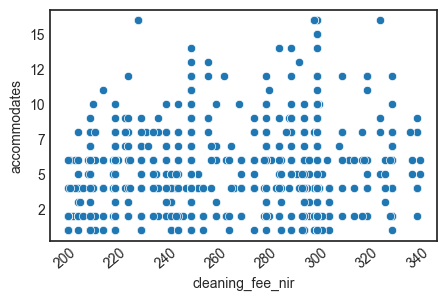

In [98]:
sns.scatterplot(x='cleaning_fee_nir',y='accommodates',data = clf200)
setup_plot()

In [99]:
len(clf200)

1467

In [100]:
(26000-1467)/26000

0.9435769230769231

*Comment: Will not drop the ones above 200, since it would be quite high number of items to be lost.*

#### Price

In [101]:
sugested_df['price'].describe().reset_index()

,index,price
0,count,26000.000000
1,mean,191.202615
2,std,259.101229
3,min,0.000000
4,25%,80.000000
5,50%,130.000000
6,75%,220.000000
7,max,12999.000000


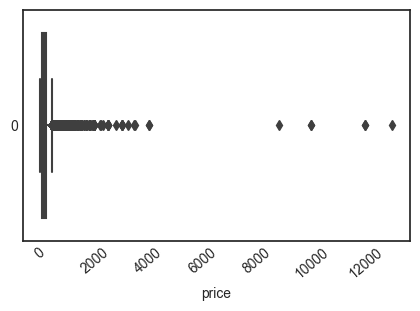

In [102]:
sns.boxplot(x=sugested_df['price'])
setup_plot()

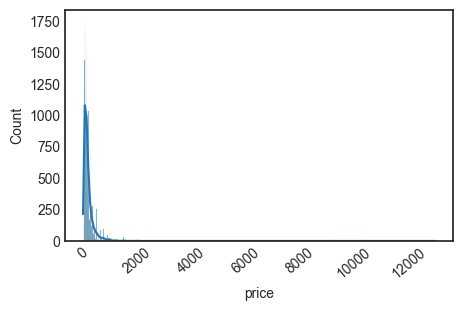

In [103]:
sns.histplot(x=sugested_df['price'], kde=True)
setup_plot()

In [104]:
non_outlier_price = (
    (sugested_df['price'] < sugested_df['price'].quantile(0.97)) & 
    (sugested_df['price'] > sugested_df['price'].quantile(0.02))
)
data = sugested_df[non_outlier_price]

In [105]:
len(data)

24683

In [106]:
26000-24683

1317

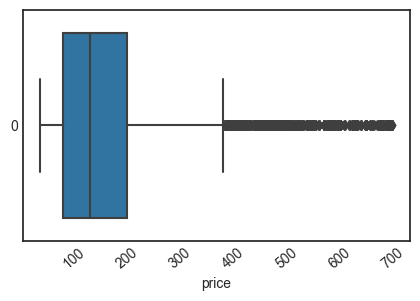

In [107]:
sns.boxplot(x=data['price'])
setup_plot()

In [108]:
price400 = data.loc[data['price'] > 400]
price400.head(7)

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,host_identity_verified,cancellation_policy,accommodates,price,review_scores_rating_nir,cleaning_fee_nir
2,2009.0,-33.800929,151.261722,3.0,3.0,3.0,1,5,168,t,strict,6,469.0,100.0,100.0
6,2009.0,-33.859072,151.172753,2.0,4.0,4.0,15,7,175,t,strict,8,451.0,96.0,20.0
36,2011.0,-33.829992,151.218311,2.0,2.0,2.0,6,6,365,f,strict,5,401.0,100.0,100.0
42,2011.0,-33.859990,151.175848,2.0,3.0,4.0,8,7,213,f,strict,6,401.0,93.0,100.0
60,2011.0,-33.889041,151.272254,1.0,2.0,2.0,3,7,199,t,strict,5,401.0,90.0,200.0
67,2011.0,-34.082729,151.155977,2.5,3.0,3.0,12,2,332,f,moderate,6,580.0,95.0,0.0
76,2011.0,-33.898518,151.271100,2.0,2.0,2.0,1,10,187,t,strict,4,500.0,80.0,120.0


In [109]:
len(price400)

1688

In [110]:
(24683-1688)/24683

0.9316128509500466

In [111]:
224 + 810 + 1317

2351

*Comment: 2351 items were dropped from the original dataset which is around 8%.*

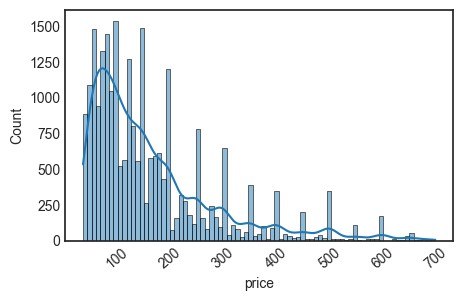

In [112]:
sns.histplot(x=data['price'], kde=True)
setup_plot()

*Comment: The target variable needs to be normally distributed, therefore need to transform the target variable.*

In [113]:
data['price'].skew()

1.6761017483493532

In [114]:
data['price_log'] = np.log1p(data['price'])  

In [115]:
data['price_log'].skew()

0.2738048064839792

In [116]:
data.columns

Index(['host_since', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'minimum_nights', 'availability_365',
       'host_identity_verified', 'cancellation_policy', 'accommodates',
       'price', 'review_scores_rating_nir', 'cleaning_fee_nir', 'price_log'],
      dtype='object')

In [117]:
data.drop('price', axis=1, inplace=True)

#### Categorical encoding

In [118]:
data = pd.get_dummies(data,columns=['host_identity_verified','cancellation_policy'],drop_first = True)

In [119]:
data.head()

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,accommodates,review_scores_rating_nir,cleaning_fee_nir,price_log,host_identity_verified_t,cancellation_policy_moderate,cancellation_policy_strict
1,2009.0,-33.865153,151.191896,1.0,1.0,1.0,468,2,188,2,95.0,55.0,4.595120,True,False,True
2,2009.0,-33.800929,151.261722,3.0,3.0,3.0,1,5,168,6,100.0,100.0,6.152733,True,False,True
3,2009.0,-33.890765,151.200450,1.0,1.0,1.0,172,2,215,2,89.0,100.0,4.158883,True,True,False
4,2009.0,-33.889667,151.200896,2.0,1.0,1.0,147,2,287,1,90.0,100.0,3.688879,True,True,False
5,2009.0,-33.880455,151.216541,1.0,1.0,1.0,272,2,285,2,88.0,20.0,4.718499,True,False,True


In [120]:
data['host_identity_verified_t'] = data['host_identity_verified_t'].astype(int)
data['cancellation_policy_moderate'] = data['cancellation_policy_moderate'].astype(int)
data['cancellation_policy_strict'] = data['cancellation_policy_strict'].astype(int)

In [121]:
data.head()

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,accommodates,review_scores_rating_nir,cleaning_fee_nir,price_log,host_identity_verified_t,cancellation_policy_moderate,cancellation_policy_strict
1,2009.0,-33.865153,151.191896,1.0,1.0,1.0,468,2,188,2,95.0,55.0,4.595120,1,0,1
2,2009.0,-33.800929,151.261722,3.0,3.0,3.0,1,5,168,6,100.0,100.0,6.152733,1,0,1
3,2009.0,-33.890765,151.200450,1.0,1.0,1.0,172,2,215,2,89.0,100.0,4.158883,1,1,0
4,2009.0,-33.889667,151.200896,2.0,1.0,1.0,147,2,287,1,90.0,100.0,3.688879,1,1,0
5,2009.0,-33.880455,151.216541,1.0,1.0,1.0,272,2,285,2,88.0,20.0,4.718499,1,0,1


### Checking for multicollinearity

In [122]:
corr = abs(pd.DataFrame(data.corr().price_log)).sort_values(by='price_log', ascending=False)
corr

,price_log
price_log,1.000000
accommodates,0.654878
bedrooms,0.605633
beds,0.563131
cleaning_fee_nir,0.414375
bathrooms,0.378661
cancellation_policy_strict,0.256744
longitude,0.234063
latitude,0.129343
host_since,0.114441


<AxesSubplot: >

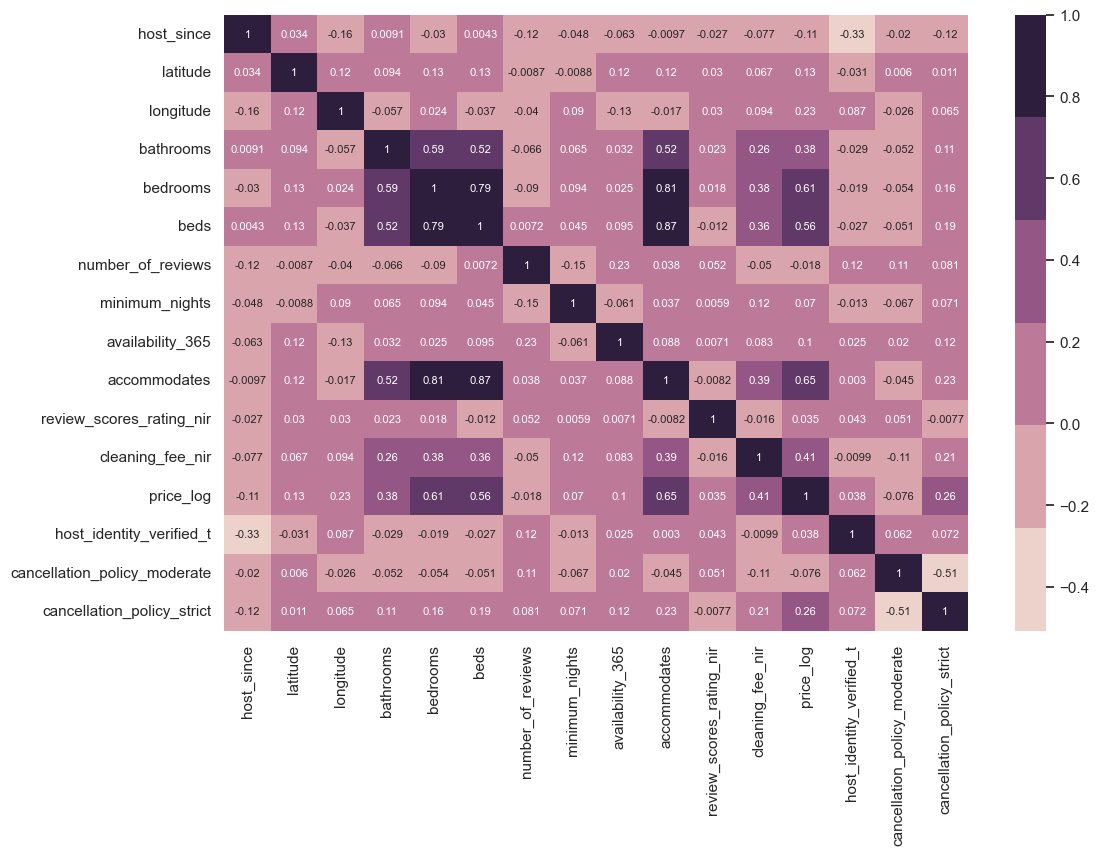

In [123]:
plt.figure(figsize = (12,8))
colormap = sns.cubehelix_palette()
sns.set(font_scale = 1.0)
sns.heatmap(data.corr(), annot=True, cmap=colormap, annot_kws={"size": 8})

*Comment: bedrooms, beds, bathrooms and accomodates are correalated with each other. Therefore we definately need to reduce the number of features, will use RFE during modelling.*

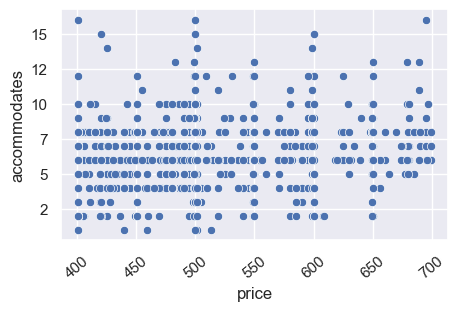

In [124]:
sns.scatterplot(x='price',y='accommodates',data = price400)
setup_plot()

### Data Preparation for modelling

In [125]:
data.dtypes

host_since                      float64
latitude                        float64
longitude                       float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
number_of_reviews                 int64
minimum_nights                    int64
availability_365                  int64
accommodates                      int64
review_scores_rating_nir        float64
cleaning_fee_nir                float64
price_log                       float64
host_identity_verified_t          int32
cancellation_policy_moderate      int32
cancellation_policy_strict        int32
dtype: object

In [128]:
data.to_csv(r'C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Machine learning\Airbnb Sydney\data.csv', index=False)

In [129]:
X = data.drop('price_log', axis=1)
y = data['price_log']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [131]:
sscaler = StandardScaler()
X_trains = sscaler.fit_transform(X_train)

In [132]:
rscaler = RobustScaler()
X_trainr = rscaler.fit_transform(X_train)

*Comment: I will use the scaled dataset for the simple models, not the tree-based ones.*

## Machine Learning modelling

**simple Lasso**

In [133]:
lcv=LassoCV().fit(X_train, y_train)
y_pred_lcv = lcv.predict(X_test)
mse_lcv = mean_squared_error(y_test, y_pred_lcv)
rmse_lcv = np.sqrt(mse_lcv)
rmse_lcv

0.46863897807836263

In [134]:
lcv.score(X_test, y_test)

0.49040054695191404

**Let's compare the StandardScaler and the RobustScaler**

In [135]:
lcvs=LassoCV().fit(X_trains, y_train)
y_pred_lcvs = lcvs.predict(X_test)
mse_lcvs = mean_squared_error(y_test, y_pred_lcvs)
rmse_lcvs = np.sqrt(mse_lcvs)
rmse_lcvs

34.16197299970401

In [136]:
lcvs.score(X_test, y_test)

-2706.933710837772

In [137]:
lcvr=LassoCV().fit(X_trainr, y_train)
y_pred_lcvr = lcv.predict(X_test)
mse_lcvr = mean_squared_error(y_test, y_pred_lcvr)
rmse_lcvr = np.sqrt(mse_lcvr)
rmse_lcvr

0.46863897807836263

In [138]:
lcvr.score(X_test, y_test)

-5106.576451435938

*Comment: RobustScaler looks better than Standard scaler, however giving the same result as without scaling. The reason might be that there are still some outliers in the dataset. Even though the metric will be rmse, also checked the score and with the scaled dataset, the final results are weaker.*

**linear regresion**

In [139]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
rmse

0.4427311803765786

In [140]:
lr.score(X_test, y_test)

0.5451875368281253

**Let's also try RFE with Linear Regression**

In [141]:
rfe_lr = RFE(estimator=LinearRegression(), n_features_to_select = 10, step = 3, verbose = 1)
rfe_lr.fit(X_train,y_train)
lr_mask = rfe_lr.support_

Fitting estimator with 15 features.
Fitting estimator with 12 features.


In [142]:
lr_ranking = rfe_lr.ranking_
selected_features = X_train.columns[lr_mask]
print("Selected features:", selected_features)

Selected features: Index(['host_since', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds',
       'accommodates', 'review_scores_rating_nir',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object')


In [143]:
print("Feature ranking:", lr_ranking)

Feature ranking: [1 1 1 1 1 1 2 3 3 1 1 2 3 1 1]


In [144]:
rfe_lr.score(X_test,y_test)

0.5268343972831906

In [145]:
y_pred_rfe_lr = rfe_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_rfe_lr)
rmse_lr = np.sqrt(mse_lr)
rmse_lr

0.4515756476951271

*Comment: No significant improvement by the RFE model.*

**Random Forest**

In [146]:
rf = RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
rmse

0.3904431252004957

In [147]:
rf.score(X_train, y_train)

0.9497625994665951

In [148]:
rf.score(X_test, y_test)

0.6462734166862756

*Comment: highly overfitting.*

**Random Forest with RFE - reduced number of features**

In [149]:
rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select = 10, step = 3, verbose = 1)
rfe_rf.fit(X_train,y_train)
rf_mask = rfe_rf.support_

Fitting estimator with 15 features.
Fitting estimator with 12 features.


In [150]:
rf_ranking = rfe_rf.ranking_
selected_features = X_train.columns[rf_mask]
print("Selected features:", selected_features)

Selected features: Index(['host_since', 'latitude', 'longitude', 'bedrooms', 'number_of_reviews',
       'minimum_nights', 'availability_365', 'accommodates',
       'review_scores_rating_nir', 'cleaning_fee_nir'],
      dtype='object')


In [151]:
print("Feature ranking:", rf_ranking)

Feature ranking: [1 1 1 2 1 2 1 1 1 1 1 1 3 3 3]


In [152]:
rfe_rf.score(X_test,y_test)

0.6389038840722874

In [153]:
y_pred_rfe = rfe_rf.predict(X_test)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
rmse_rfe = np.sqrt(mse_rfe)
rmse_rfe

0.39448940099274815

#### Hyperparameter tuning for Random Forest with Randomized Search CV.

In [156]:
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [157]:
random_search = RandomizedSearchCV(rf, rf_grid, cv=5, n_jobs=1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=200,
                                                   random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20],
                                        'n_estimators': [100, 200, 300]})

In [158]:
print("Test set score: {:.2f}".format(random_search.score(X_test, y_test)))
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
print("Best estimator:\n{}".format(random_search.best_estimator_))

Test set score: 0.65
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation score: 0.63
Best estimator:
RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=42)


In [159]:
rf_tuned = RandomForestRegressor(n_estimators=300,min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=20, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_tuned = np.sqrt(mse_tuned)
rmse_tuned

0.3870631719180609

In [166]:
y_pred_rf_tuned

array([4.61456294, 5.58440949, 5.87487501, ..., 4.68548565, 5.1941577 ,
       6.04211266])

**n_estimators=300** -  Increasing the number of trees in your random forest can help reduce overfitting by averaging out the predictions and making the model more robust.

**max_depth=20** - Deep trees can model noise in the training data, leading to overfitting. Limiting the depth of each tree prevents this by simplifying the model.

**min_samples_split=2, min_samples_leaf=1** - By requiring a minimum number of samples for a split or leaf node, you prevent the model from creating small, highly specific trees that overfit the training data

**max_features='log'** - By selecting a random subset of features for each tree, the model becomes less sensitive to noise and less likely to overfit.


*Comment: This model performs the best - the rmse is the lowest.*

*We need to transform the target variable back:*

In [167]:
y_pred = np.expm1(y_pred_rf_tuned)

In [168]:
y_pred

array([ 99.9437009 , 265.24301786, 354.98016375, ..., 107.36288562,
       179.21628317, 419.78106319])

In [170]:
y_test_norm = np.expm1(y_test)

In [171]:
mse_norm = mean_squared_error(y_test_norm, y_pred)
rmse_norm = np.sqrt(mse_norm)
rmse_norm

76.77265551902839

In [162]:
feature_names = X_train.columns.tolist()
feature_names

['host_since',
 'latitude',
 'longitude',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'minimum_nights',
 'availability_365',
 'accommodates',
 'review_scores_rating_nir',
 'cleaning_fee_nir',
 'host_identity_verified_t',
 'cancellation_policy_moderate',
 'cancellation_policy_strict']

In [177]:
input_data = {
    'host_since': [2010], 
    'latitude': [33.889087],
    'longitude': [151.274506],
    'bathrooms': [3],
    'bedrooms': [5],
    'beds': [7],
    'number_of_reviews': [53],
    'minimum_nights': [4],
    'availability_365': [255],
    'accommodates': [10],
    'review_scores_rating_nir': [95.0],
    'cleaning_fee_nir': [370],
    'host_identity_verified_t': [1],
    'cancellation_policy_moderate': [0],
    'cancellation_policy_strict': [1]
}

input_df = pd.DataFrame(input_data)

In [178]:
input_df 

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,accommodates,review_scores_rating_nir,cleaning_fee_nir,host_identity_verified_t,cancellation_policy_moderate,cancellation_policy_strict
0,2010,33.889087,151.274506,3,5,7,53,4,255,10,95.0,370,1,0,1


In [179]:
X_train

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,accommodates,review_scores_rating_nir,cleaning_fee_nir,host_identity_verified_t,cancellation_policy_moderate,cancellation_policy_strict
23364,2014.0,-33.786436,151.285153,1.0,1.0,1.0,0,2,142,2,97.0,69.0,1,1,0
10505,2015.0,-33.871366,151.221992,1.0,1.0,1.0,11,3,94,5,87.0,125.0,1,0,1
12730,2011.0,-33.865933,151.278940,1.0,1.0,1.0,4,2,89,2,100.0,30.0,1,1,0
14457,2014.0,-33.802754,151.288362,1.0,1.0,1.0,14,2,364,2,92.0,60.0,1,0,1
26993,2018.0,-33.821293,151.202060,1.0,1.0,1.0,22,2,0,3,95.0,60.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14492,2016.0,-33.884869,151.257257,1.0,1.0,1.0,19,5,0,2,96.0,30.0,1,1,0
21571,2015.0,-33.894160,151.253714,1.0,1.0,1.0,1,9,0,1,100.0,0.0,1,0,1
10715,2015.0,-33.900537,151.213172,1.0,1.0,1.0,12,2,279,2,98.0,50.0,0,0,1
11774,2016.0,-33.918923,151.258757,1.0,1.0,1.0,19,4,26,2,94.0,0.0,1,1,0


In [180]:
input_df = input_df[feature_names]

In [181]:
input_df

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,accommodates,review_scores_rating_nir,cleaning_fee_nir,host_identity_verified_t,cancellation_policy_moderate,cancellation_policy_strict
0,2010,33.889087,151.274506,3,5,7,53,4,255,10,95.0,370,1,0,1


In [182]:
X_test

,host_since,latitude,longitude,bathrooms,bedrooms,beds,number_of_reviews,minimum_nights,availability_365,accommodates,review_scores_rating_nir,cleaning_fee_nir,host_identity_verified_t,cancellation_policy_moderate,cancellation_policy_strict
26064,2017.0,-33.878015,151.234462,1.0,1.0,1.0,23,2,0,2,97.0,40.0,0,1,0
24132,2012.0,-33.874263,151.259737,1.0,3.0,3.0,2,2,0,5,90.0,50.0,0,0,0
19696,2017.0,-33.855762,151.182035,2.0,3.0,4.0,1,2,0,6,100.0,220.0,0,0,1
15080,2015.0,-33.897728,151.200904,1.0,1.0,1.0,9,2,0,2,100.0,80.0,1,1,0
12214,2014.0,-33.799168,151.286024,1.0,1.0,1.0,2,2,155,2,90.0,20.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21465,2015.0,-33.895907,151.261702,1.0,2.0,2.0,1,3,65,4,100.0,50.0,1,0,0
9741,2014.0,-33.887136,151.276644,2.0,1.0,1.0,3,1,0,1,100.0,140.0,0,0,0
1739,2014.0,-33.870036,151.204968,1.0,1.0,1.0,192,3,0,2,97.0,0.0,1,1,0
4288,2013.0,-33.878293,151.219395,1.0,2.0,2.0,15,3,0,4,97.0,50.0,1,0,0


In [183]:
y_pred_final = rf_tuned.predict(input_df)

In [184]:
y_pred_f = np.expm1(y_pred_final)

In [185]:
y_pred_f 

array([415.00608366])

In [187]:
print(f"Estimated fair daily accommodation rate: ${y_pred_f[0]:.2f}")

Estimated fair daily accommodation rate: $415.01


## Based on the machine learning model, the owner shall charge 415$ for such house accomodating 10 people on Bondi Beach.